# Titanic Dataset

### Importation des bibliothèques nécessaires et chargement du dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# Charger le dataset Titanic
df = pd.read_csv('train.csv')  
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Nettoyage des données
### 1.Identification des colonnes avec valeurs manquantes et gestion de celles-ci :

In [33]:
# Vérification des valeurs manquantes initiales
print("Missing values before handling:\n", df.isnull().sum())

# Traitement des colonnes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Vérification après nettoyage
print("Missing values after handling:\n", df.isnull().sum())


Missing values before handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 2.Détection et gestion des doublons

In [38]:
# Vérifier les doublons
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)  # Supprimer les doublons


Duplicate rows: 0


### 3.Gestion des outliers dans la colonne 'Fare'

In [42]:
# Détection des outliers avec la méthode IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])


## Feature Engineering
### 4.Création de nouvelles colonnes FamilySize et IsAlone

In [45]:
# FamilySize = SibSp + Parch + 1 (le passager lui-même)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone : 1 si FamilySize == 1, sinon 0
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


### 5.Extraction des titres à partir des noms

In [52]:
# Extraire le titre
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print(df['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


## Encodage des variables catégoriques
### 7.Encodage des colonnes Sex et Embarked


In [54]:
# One-hot encoding pour Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Label encoding pour Sex
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


## 8.Explication des méthodes d’encodage


One-Hot Encoding : Utilisé pour les variables non ordinales.

Label Encoding : Transforme les catégories en valeurs numériques.

Ordinal Encoding : Pour les variables ayant une hiérarchie claire.

Pour Embarked, One-Hot Encoding est préférable car les valeurs n'ont pas d'ordre.


## Normalisation et Standardisation
### 9.Standardisation des colonnes Fare et Age

In [64]:
scaler = StandardScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])


### 10.Impact de la standardisation sur les distributions Utiliser un histogramme ou un diagramme de densité pour comparer avant et après :


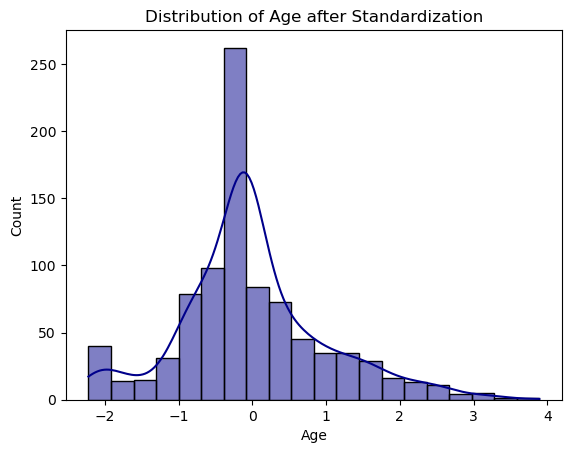

In [135]:
sns.histplot(df['Age'], kde=True,bins=20, color = 'darkblue')
plt.title('Distribution of Age after Standardization')
plt.show()


## Réduction dimensionnelle (PCA)
### 12.Application de PCA

In [119]:
# Séparer les caractéristiques numériques pour PCA
features = df.select_dtypes(include=[np.number]).drop(columns=['Survived'])

# Application de PCA
pca = PCA(n_components=0.95)  # Maintenir 95% de la variance
features_pca = pca.fit_transform(features)
print("Number of components chosen:", pca.n_components_)


Number of components chosen: 1


## Division des données
### 13.Division en jeu d’apprentissage et de test

In [90]:
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Exclure des colonnes inutiles
y = df['Survived']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 14.Gestion des données déséquilibrées
Utiliser SMOTE ou ajuster les poids de classe dans le modèle.

### 15.Différences entre Normalisation et Standardisation
Normalisation : Mise à l’échelle des données entre 0 et 1.

Standardisation : Centrage autour de 0 avec un écart type de 1.

### 16. Comment gérer les données déséquilibrées ?
Lorsque le nombre de survivants est beaucoup plus faible que celui des non-survivants, cela crée un déséquilibre dans les classes. Voici quelques techniques pour y faire face :

#### Techniques de rééchantillonnage :

Suréchantillonnage (Oversampling) : Augmenter le nombre d'échantillons de la classe minoritaire à l'aide de méthodes comme :

SMOTE (Synthetic Minority Over-sampling Technique) : Génère des échantillons synthétiques pour la classe minoritaire.

Suréchantillonnage aléatoire : Duplique les échantillons existants de la classe minoritaire.

Sous-échantillonnage (Undersampling) : Réduire le nombre d'échantillons de la classe majoritaire pour équilibrer les classes.

#### Ajustement des poids des classes :

Attribuer des poids plus élevés à la classe minoritaire lors de l'entraînement du modèle (par exemple, en utilisant le paramètre class_weight='balanced' dans certains modèles comme RandomForestClassifier).

Modèles de détection d'anomalies :

Traiter la classe minoritaire comme une anomalie et utiliser des algorithmes de détection d'anomalies.

#### Utilisation d'algorithmes avancés :

Certains algorithmes comme XGBoost, LightGBM ou CatBoost gèrent bien les données déséquilibrées grâce à des mécanismes internes.

#### Métriques d'évaluation :

Utilisez des métriques telles que F1-Score, Précision-Rappel AUC, ou ROC AUC plutôt que l'exactitude, car l'exactitude peut être trompeuse avec des ensembles de données déséquilibrés.


### 17.Pourquoi utiliser validation et cross-validation ?
Validation : Évaluer la performance sur un échantillon séparé.

Cross-validation : Réduire la variance et mieux évaluer la généralisation du modèle.


### 18. Pourquoi utilisons-nous la validation et la validation croisée ?
#### Validation
##### Objectif :

Évaluer la performance du modèle sur des données non vues pour vérifier s'il y a surapprentissage (overfitting) ou sous-apprentissage (underfitting).

##### Processus :

Divisez le dataset en un ensemble d'entraînement et un ensemble de validation (par exemple, 80% pour l'entraînement et 20% pour la validation).

##### Inconvénient :

Un seul échantillon de validation peut ne pas être représentatif de l'ensemble des données.

#### Validation Croisée

##### Objectif :

Fournir une évaluation plus fiable en testant le modèle sur plusieurs sous-ensembles du dataset.

##### Types :

##### K-fold Cross-Validation :
Divise les données en 
𝑘
k sous-ensembles. Le modèle est entraîné sur 
𝑘
−
1
k−1 sous-ensembles et testé sur le restant. Répétez 
𝑘
k fois.

##### Stratified K-fold :
Semblable à K-fold, mais assure que les proportions des classes sont respectées dans chaque sous-ensemble.

##### Leave-One-Out Cross-Validation (LOOCV) :

Chaque échantillon est utilisé une fois comme ensemble de test, les autres étant utilisés pour l'entraînement.

#### Avantages :
Réduit la variance dans l'évaluation du modèle en le testant sur plusieurs sous-ensembles.

Permet de mieux utiliser les données disponibles par rapport à un simple split train-validation.
